# Problem 1.1

### (1)

Starting from the forward process:

$$
x_t = \sqrt{\alpha_t} \, x_{t-1} + \sqrt{\beta_t} \, \epsilon_t, \quad \epsilon_t \sim \mathcal{N}(0, I)
$$

Recursively expand $ x_t $ back to $ x_0 $:

$$
\begin{align*}
x_t &= \sqrt{\alpha_t} \left( \sqrt{\alpha_{t-1}} x_{t-2} + \sqrt{\beta_{t-1}} \epsilon_{t-1} \right) + \sqrt{\beta_t} \epsilon_t \\
&= \sqrt{\alpha_t \alpha_{t-1}} x_{t-2} + \sqrt{\alpha_t} \sqrt{\beta_{t-1}} \epsilon_{t-1} + \sqrt{\beta_t} \epsilon_t \\
&\vdots \\
&= \left( \prod_{s=1}^t \sqrt{\alpha_s} \right) x_0 + \sum_{s=1}^t \left( \sqrt{\beta_s} \prod_{i=s+1}^t \sqrt{\alpha_i} \, \epsilon_s \right)
\end{align*}
$$

Using $ \bar{\alpha}_t = \prod_{s=1}^t \alpha_s $:

$$
x_t = \sqrt{ \bar{\alpha}_t } \, x_0 + \sum_{s=1}^t \sqrt{ \beta_s \frac{ \bar{\alpha}_t }{ \bar{\alpha}_s } } \, \epsilon_s
$$

Given $\alpha_t = 1 - \beta_t$, we can simplify the variance by forming a telescoping sum:

$$\sum_{s=1}^t  \beta_s \frac{ \bar{\alpha}_t }{ \bar{\alpha}_s }  \ = \bar{\alpha}_t \sum_{s=1}^t  (1-\alpha_s) \frac{ 1 }{ \bar{\alpha}_s }  \ = \bar{\alpha}_t (\sum_{s=1}^t \frac{1}{\bar{\alpha}_s}-\sum_{s=1}^t \frac{1}{\bar{\alpha}_{s-1}} ) = 1 - \bar{\alpha}_t $$

$$
\text{Var}( x_t | x_0 ) = \sum_{s=1}^t \left( \beta_s \frac{ \bar{\alpha}_t }{ \bar{\alpha}_s } \right) I = \left( 1 - \bar{\alpha}_t \right) I
$$

Therefore, the conditional distribution is:

$$
q( x_t | x_0 ) = \mathcal{N} \left( \sqrt{ \bar{\alpha}_t } \, x_0, \left( 1 - \bar{\alpha}_t \right) I \right)
$$

### (2)

Given part (1)'s derivation, we have:
$$
q( x_t | x_0 ) = \mathcal{N} \left( \sqrt{ \bar{\alpha}_t } \, x_0, \left( 1 - \bar{\alpha}_t \right) I \right)
$$
Given the variance schedule $\beta_t \in (0, 1)$ and $\alpha_t = 1 - \beta_t$, we have:

$$
\bar{\alpha}_t = \prod_{i=1}^t \alpha_i = \prod_{i=1}^t (1 - \beta_i)

$$
Assuming a lower bound $\beta_i > c$ for infinitely many $i$ and some constant $c > 0$, then:

$$
\log \bar{\alpha}_t = \sum_{i=1}^t \log(1 - \beta_i) \leq \sum_{i=1}^t \log(1 - c) = t \cdot \log(1 - c)
$$

Since $\log(1 - c) < 0$, this implies:

$$
\bar{\alpha}_t \leq \exp(t \log(1 - c)) = (1 - c)^t \rightarrow 0 \quad \text{as} \quad t \rightarrow \infty
$$

therefore:

$$\sqrt{ \bar{\alpha}_t } \, x_0  \rightarrow 0 \quad \text{as} \quad t \rightarrow \infty$$
$$( 1 - \bar{\alpha}_t ) I \rightarrow I \quad \text{as} \quad t \rightarrow \infty$$


Thus, the limiting distribution becomes:

$$
\lim_{t \to \infty} q(x_t | x_0) = \mathcal{N}(0, I)
$$

Since $q(x_T) = \mathbb{E}_{x_0 \sim q(x)} \left[ q(x_T | x_0) \right]$, and $q(x_T | x_0)$ converges to $\mathcal{N}(0, I)$ for all $x_0$, we conclude:

$$
\lim_{T \to \infty} q(x_T) = \mathcal{N}(0, I)
$$


# Problem 1.2

### (3)

From previous part, we have:
$$
q(x_t \mid x_{t-1}) = \mathcal{N}(x_t; \sqrt{\alpha_t} x_{t-1}, \beta_t \mathbf{I})
$$
$$
q(x_{t-1} \mid x_0) = \mathcal{N}(x_{t-1}; \sqrt{\bar{\alpha}_{t-1}} x_0, (1 - \bar{\alpha}_{t-1}) \mathbf{I})
$$
We can view the joint distribution:
$$
q(x_t, x_{t-1} \mid x_0) = q(x_t \mid x_{t-1}) \cdot q(x_{t-1} \mid x_0)
$$

Then apply Bayes' rule to compute:

$$
q(x_{t-1} \mid x_t, x_0)
$$

We treat both terms as Gaussians over $x_{t-1}$:

- Prior: $x_{t-1} \sim \mathcal{N}(\sqrt{\bar{\alpha}_{t-1}} x_0,  (1 - \bar{\alpha}_{t-1}) \mathbf{I})$
- Likelihood (in terms of $x_{t-1}$): $\mathcal{N}(x_{t-1};  \frac{1}{\sqrt{\alpha_t}} x_t,  \frac{\beta_t}{\alpha_t} \mathbf{I})$

The posterior variance from the product of Gaussians is:

$$
\tilde{\beta}_t = \left[ \frac{1}{\beta_t} + \frac{\alpha_t}{1 - \bar{\alpha}_{t-1}} \right]^{-1}
$$
Multiply numerator and denominator by $(1 - \bar{\alpha}_{t-1})$:

$$
\tilde{\beta}_t = \frac{ \beta_t (1 - \bar{\alpha}_{t-1}) }{ \beta_t \alpha_t + (1 - \bar{\alpha}_{t-1}) }
$$

Now recall the identity:

$$
\bar{\alpha}_t = \bar{\alpha}_{t-1} \alpha_t \Rightarrow
1 - \bar{\alpha}_t = (1 - \bar{\alpha}_{t-1}) + \bar{\alpha}_{t-1}(1 - \alpha_t)
$$

Therefore, the denominator becomes $1 - \bar{\alpha}_t$ and we arrive at:

$$

\tilde{\beta}_t = \frac{1 - \bar{\alpha}_{t-1}}{1 - \bar{\alpha}_t} \cdot \beta_t

$$


### (4)
To compute the mean of 
$$
q(x_{t-1} \mid x_t, x_0) = \mathcal{N}(x_{t-1}; \tilde{\mu}_t(x_t, x_0), \tilde{\beta}_t \mathbf{I})
$$

We will use previous results:
- Prior:  
  $$
  q(x_{t-1} \mid x_0) = \mathcal{N}\left(x_{t-1}; \sqrt{\bar{\alpha}_{t-1}} x_0, (1 - \bar{\alpha}_{t-1}) \mathbf{I} \right)
  $$

- Likelihood (from forward dynamics):  
  $$
  q(x_t \mid x_{t-1}) = \mathcal{N}\left(x_t; \sqrt{\alpha_t} x_{t-1}, \beta_t \mathbf{I} \right)
  $$

Rewriting the likelihood as a distribution over $ x_{t-1}$:

$$
x_{t-1} \sim \mathcal{N}\left( \frac{1}{\sqrt{\alpha_t}} x_t, \frac{\beta_t}{\alpha_t} \mathbf{I} \right)
$$

Now use Gaussian fusion:

- Let:

  - $\mu_1 = \frac{1}{\sqrt{\alpha_t}} x_t$, $\Sigma_1 = \frac{\beta_t}{\alpha_t} \mathbf{I}$
  - $\mu_2 = \sqrt{\bar{\alpha}_{t-1}} x_0$, $\Sigma_2 = (1 - \bar{\alpha}_{t-1}) \mathbf{I}$

Then the posterior mean is:

$$
\tilde{\mu}_t = \left( \frac{\alpha_t}{\beta_t} + \frac{1}{1 - \bar{\alpha}_{t-1}} \right)^{-1}
\left( \frac{\alpha_t}{\beta_t} \cdot \frac{1}{\sqrt{\alpha_t}} x_t + \frac{1}{1 - \bar{\alpha}_{t-1}} \cdot \sqrt{\bar{\alpha}_{t-1}} x_0 \right)
$$

Multiply numerator and denominator by $\beta_t(1 - \bar{\alpha}_{t-1})$ to simplify.

Using the identity:

$$
1 - \bar{\alpha}_t = \beta_t + \alpha_t (1 - \bar{\alpha}_{t-1})
$$

the posterior mean simplifies to:

$$
\tilde{\mu}_t(x_t, x_0) = \frac{\sqrt{\alpha_t}(1 - \bar{\alpha}_{t-1})}{1 - \bar{\alpha}_t} \cdot x_t + \frac{\sqrt{\bar{\alpha}_{t-1}} \beta_t}{1 - \bar{\alpha}_t} \cdot x_0
$$



### (5)

From part (1), we have:
$$
q( x_t | x_0 ) = \mathcal{N} \left( \sqrt{ \bar{\alpha}_t } \, x_0, \left( 1 - \bar{\alpha}_t \right) I \right)
$$

Using reparameterization trick:
$$ x_t = \sqrt{ \bar{\alpha}_t } x_0 +  \sqrt{1 - \bar{\alpha}_t  } \epsilon_t  \quad \epsilon_t \sim \mathcal{N}(0, \mathbf{I}) $$
We now solve for $x_0$ in terms of $x_t$ and $\epsilon_t$:

$$
\begin{align*}
x_t &= \sqrt{\bar{\alpha}_t} \, x_0 + \sqrt{1 - \bar{\alpha}_t} \, \epsilon_t \\
x_t - \sqrt{1 - \bar{\alpha}_t} \, \epsilon_t &= \sqrt{\bar{\alpha}_t} \, x_0 \\
x_0 &= \frac{1}{\sqrt{\bar{\alpha}_t}} \left( x_t - \sqrt{1 - \bar{\alpha}_t} \, \epsilon_t \right)
\end{align*}
$$


### (6)

Given $x_0$ can be expressed as:
   $$
   x_0 = \frac{x_t - \sqrt{1 - \bar{\alpha}_t} \, \epsilon_t}{\sqrt{\bar{\alpha}_t}}
   $$

Given $\tilde{\mu}(x_t, x_0) $:

   $$
   \tilde{\mu}(x_t, x_0) = \frac{\sqrt{\alpha_t}(1 - \bar{\alpha}_{t-1})}{1 - \bar{\alpha}_t} \, x_t + \frac{\sqrt{\bar{\alpha}_{t-1}} \, \beta_t}{1 - \bar{\alpha}_t} \, x_0
   $$

We can ubstitute $ x_0 $ using $x_t$:

   $$
   \tilde{\mu}(x_t, x_0) = \frac{\sqrt{\alpha_t}(1 - \bar{\alpha}_{t-1})}{1 - \bar{\alpha}_t} \, x_t + \frac{\sqrt{\bar{\alpha}_{t-1}} \, \beta_t}{1 - \bar{\alpha}_t} \left( \frac{x_t - \sqrt{1 - \bar{\alpha}_t} \, \epsilon_t}{\sqrt{\bar{\alpha}_t}} \right) 
   $$

   $$
\tilde{\mu}(x_t, x_0) = \left( \frac{\alpha_t(1 - \bar{\alpha}_{t-1})}{(1 - \bar{\alpha}_t)\sqrt{\alpha_t}} + \frac{\beta_t}{(1 - \bar{\alpha}_t)\sqrt{\alpha_t}} \right) x_t - \frac{\beta_t \sqrt{1 - \bar{\alpha}_t}}{(1 - \bar{\alpha}_t)\sqrt{\alpha_t}} \, \epsilon_t
   $$


   $$
   \tilde{\mu}(x_t, x_0) = \frac{x_t}{\sqrt{\alpha_t}} - \frac{1 - \alpha_t}{\sqrt{\alpha_t(1 - \bar{\alpha}_t)}} \, \epsilon_t
   $$


# Problem 1.3

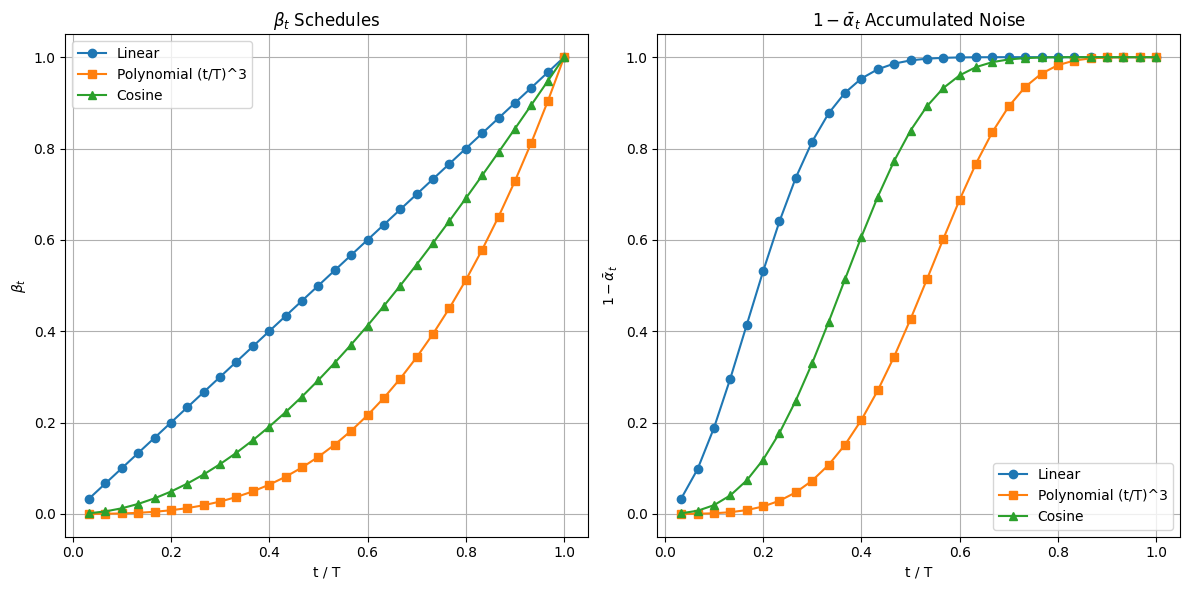

**Observations**
- Linear Schedule:
Beta schedules grows uniformly. The accumulated noise rises very quickly and converges to 1 early.This means that signal is destroyed rapidly in early steps, which can make learning hard at the beginning.

- Polynomial Schedule
Beta schedules starts near 0 and rises slowly. The accumulated noise increases gradually and only saturates near the end. Most signal is retained until late steps → helps with learning finer details early in training, but may delay full noise exposure.

- Cosine Schedule
Beta schedules starts gentle and increases more steeply later than polynomial but earlier than linear. The accumulated noise increases more slowly than polynomial and saturates later than polynomial near the end. It provides a balanced increase of noise

# Problem 1.4

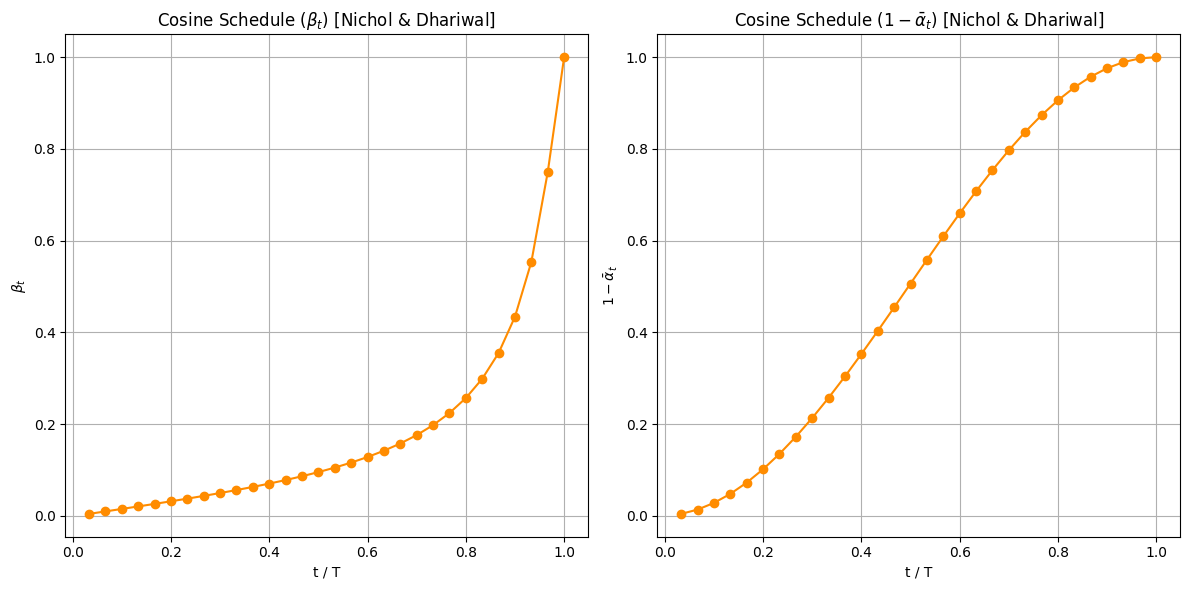

**Difference**
The beta schedules are very small in early steps and increase gradually. The accumulated noises presents smoothly at both starts and ends.

**Reason for Improved Performance**
- Better signal preservation in early steps: The model learns to denoise from more informative signals instead of pure noise, improving sample quality.
- Stabilized training: Gentle noise addition avoids rapid distribution shifts, easing optimization.


# Problem 2

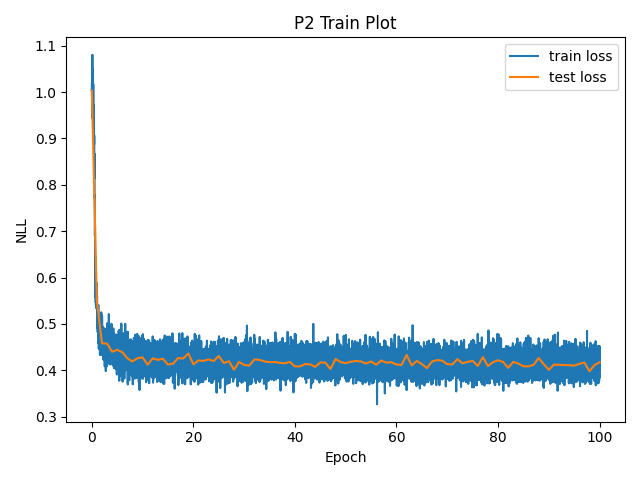

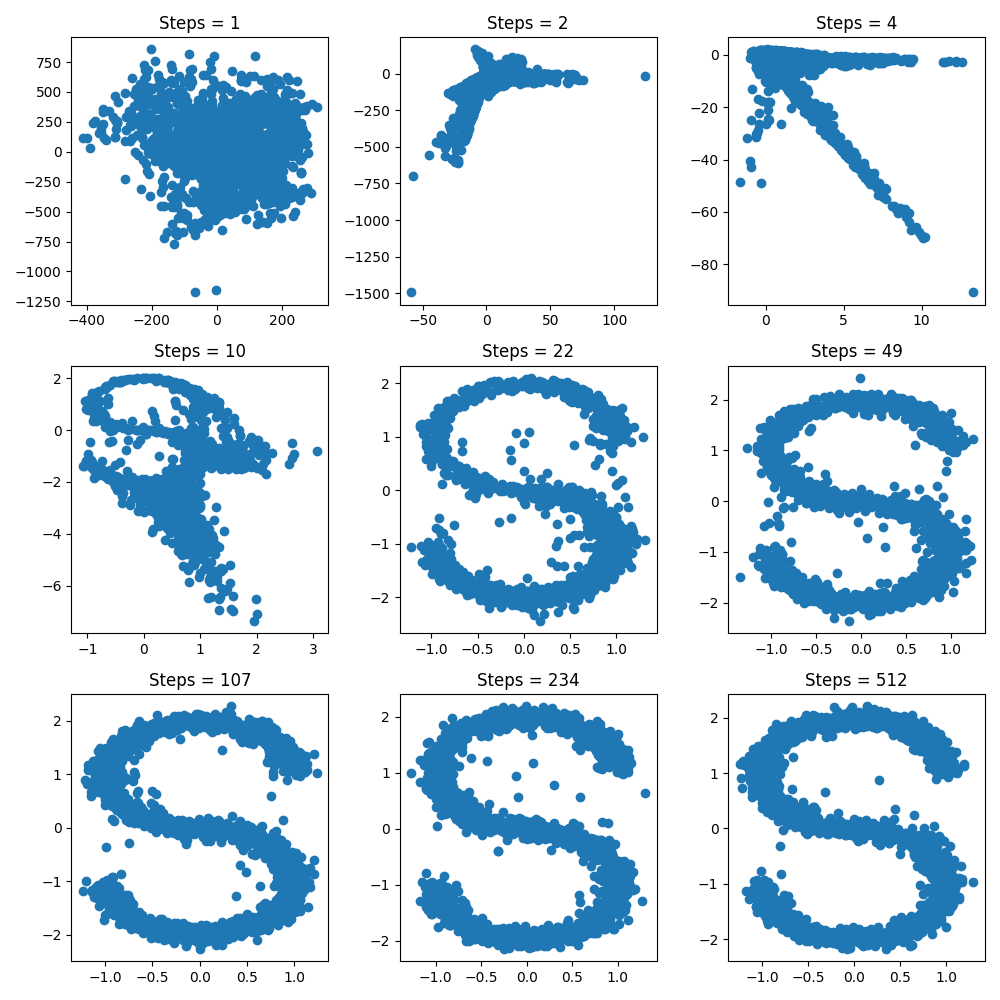